In [1]:
import pandas as pd

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor

rdDepictor.SetPreferCoordGen(True)
IPythonConsole.ipython_useSVG = True

The next bit of code is a workaround to circumvent the broken Molrendering caused by changes in [Pandas v0.25.x](https://github.com/rdkit/rdkit/issues/2673).

In [2]:
PandasTools.RenderImagesInAllDataFrames(images=True)

from IPython.core.display import HTML

def show(df):
    return HTML(df.to_html(notebook=True))

In [3]:
hits_df = PandasTools.LoadSDF('substruct_hits.sdf', molColName='mol')

,ID,mol
0,MolPort-000-000-304,
1,MolPort-000-000-321,
2,MolPort-000-000-390,
3,MolPort-000-000-411,

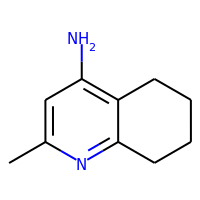
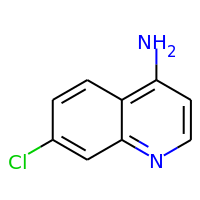
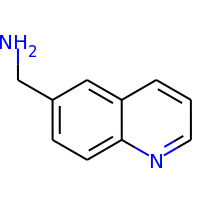
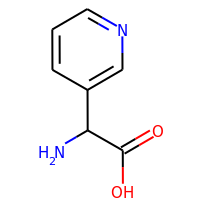

In [4]:
show(hits_df)

In [5]:
hits_df.shape

(4, 2)

We want to align the molecules in our plots to the substructure search query, so we define the query as `scaffold`, and use that to perform the alignment.

In [6]:
hits_df['scaffold'] = 'c1ccncc1'

In [7]:
PandasTools.AlignToScaffold(hits_df, molCol='mol', scaffoldCol='scaffold')

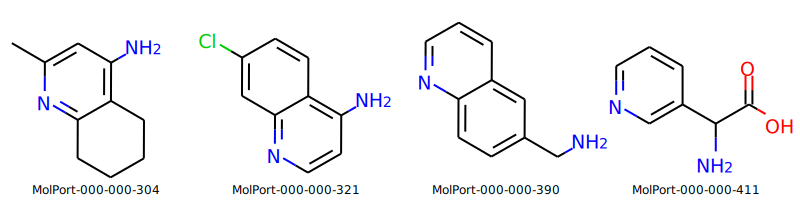

In [8]:
PandasTools.FrameToGridImage(hits_df, column='mol', legendsCol='ID', molsPerRow=4)

Since we might have a large number of hits, we'll want to plot them in chunks, so it's easier to include them in reports etc.  In order to do that, we define a function called `split`, that will split a dataframe in chunks according to a user-defined chunk size.  Full disclosure: I found the function via a Google search, but I forgot to grab the link of the webpage I copied it from.

In [9]:
import numpy as np
from rdkit.Chem import Draw

In [10]:
# Define a function that splits the big df
def split(dfrm, chunk_size):
    def index_marks(nrows, chunk_size):
        return range(1 * chunk_size, (nrows // chunk_size + 1) * chunk_size, chunk_size)
    indices = index_marks(dfrm.shape[0], chunk_size)
    return np.split(dfrm, indices)

In [11]:
chunk_size = 8

In [12]:
chunks = split(hits_df, chunk_size)

In [13]:
i = 0

for c in chunks:
    i += 1
    img = PandasTools.FrameToGridImage(c,
                                      column='mol',
                                      subImgSize=(300, 300),
                                      legendsCol='ID',
                                      molsPerRow=4,
                                      useSVG=False)
    img.save("substruct_hits_" + str(i) + ".png")